In [ ]:
from utils import read_im , save_im, normalize
import numpy as np
import matplotlib.pyplot as plt

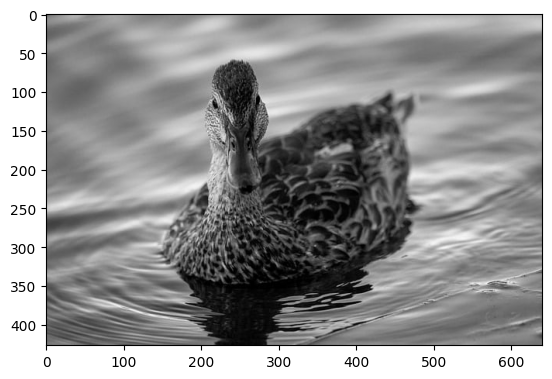

In [ ]:
im = read_im("images/duck.jpeg")

def greyscale(im):
    """ Converts an RGB image to greyscale

    Args:
        im ([type]): [np.array of shape [H, W, C]]

    Returns:
        im ([type]): [np.array of shape [H, W]]
    """
    im = 0.212*im[:,:,0] + 0.7152*im[:,:,1] + 0.0722*im[:,:,2]

    return im

im_greyscale = greyscale(im)

plt.imshow(im_greyscale, cmap='gray')
save_im("results/duck_greyscale.jpeg", im_greyscale, cmap='gray')

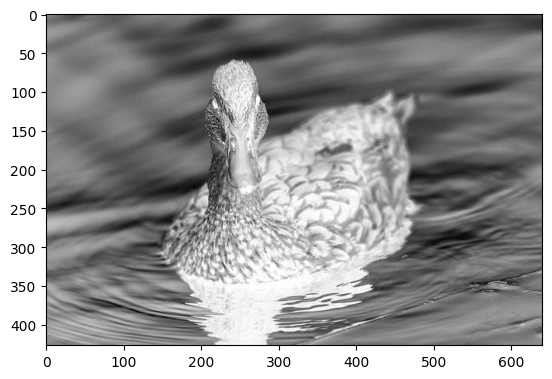

In [ ]:
im = read_im("results/duck_greyscale.jpeg")

def inverse(im):
    """ Finds the inverse of the grayscale image

    Args:
        im ([type]): [np.array of shape [H, W]]

    Returns:
        im ([type]): [np.array of shape [H, W]]
    """
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            im[i][j] = 1 - im[i][j]
    return im

im_inverse = inverse(im)

plt.imshow(im_inverse, cmap='gray')
save_im("results/duck_inverse.jpeg", im_inverse, cmap='gray')

In [ ]:
def convolve_im(im, kernel):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    new_image = im.copy()

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):

            sum_r = 0
            sum_g = 0
            sum_b = 0
            a = int((kernel.shape[0]-1)/2)
            b = int((kernel.shape[1]-1)/2)

            for s in range(-a,a+1):
                for t in range(-b,b+1):
                    if i-s < 0 or j-t < 0 or i-s >= im.shape[0] or j-t >= im.shape[1]:
                        pass
                    else:
                        sum_r += kernel[a+s][b+t] * im[i-s][j-t][0]
                        sum_g += kernel[a+s][b+t] * im[i-s][j-t][1]
                        sum_b += kernel[a+s][b+t] * im[i-s][j-t][2]

            new_image[i][j][0] = sum_r
            new_image[i][j][1] = sum_g
            new_image[i][j][2] = sum_b

    return new_image

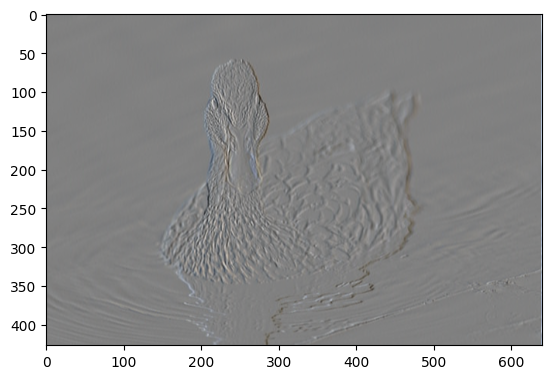

In [ ]:
h_a = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)

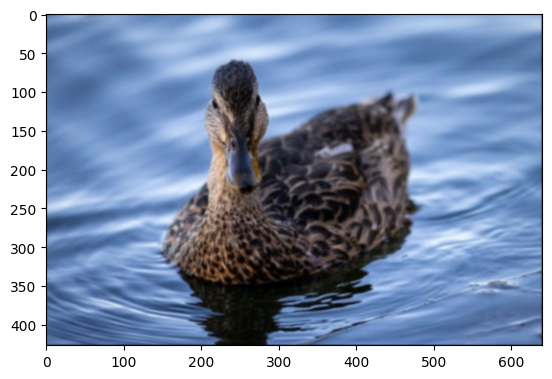

In [ ]:
h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
 
im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap='gray')
save_im("results/duck_smoothed.jpeg", im_smoothed)